# PCA: is just a transformation of our data and attempts to find out what features explain the most variance in our data.
As we've noticed before it is difficult to visualize high dimensional data, we can use PCA to find the first two principal components, and visualize the data in this new, two-dimensional space, with a single scatter-plot. Before we do this though, we'll need to scale our data so that each feature has a single unit variance.

PCA with Scikit Learn uses a very similar process to other preprocessing functions that come with SciKit Learn. We instantiate a PCA object, find the principal components using the fit method, then apply the rotation and dimensionality reduction by calling transform(). We can also specify how many components we want to keep when creating the PCA object.

We've reduced 720 dimensions to just 2! Let's plot these two dimensions out!

Reference: https://github.com/NataliaDiaz/anomaly-detection-inverted-pca/blob/master/Principal%20Component%20Analysis.ipynb

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
%matplotlib inline

def getData(balance_ones=True):
    # images are 60x12 = 720 size vectors
    NUM = []  #1 - 32
    SAMPLE = []  #7
    X = []  #32*7
    
    first = True
    for line in open('all_samples.csv'):
        if first:
            first = False
        else:
            row = line.split(',')
            NUM.append(int(row[0]))  #cell number
            SAMPLE.append(int(row[1]))  #sample number
            X.append([float(p) for p in row[2].split(' ')])
            
    NUM, SAMPLE, X = np.array(NUM), np.array(SAMPLE), np.array(X)
    #X = np.array(X)

    return NUM, SAMPLE, X

In [47]:
from sklearn.preprocessing import StandardScaler

def scaler():   
    NUM, SAMPLE, X = getData()
    
    scaler = StandardScaler()
    scaler.fit(X)
    print(scaler.fit(X))
    
    scaled_data = scaler.transform(X)
    print(scaled_data)

    return scaled_data, NUM, SAMPLE


In [48]:
from sklearn.decomposition import PCA
import pandas as pd
import numpy 

def pca():
    scaled_data, NUM,SAMPLE = scaler()
    
    pca = PCA(n_components=2)
    pca.fit(scaled_data)
    x_pca = pca.transform(scaled_data)
    
    print(scaled_data.shape)
    print(x_pca.shape)
    print(NUM)
    print(pca.components_)
    
    kmeans = KMeans(n_clusters=32, random_state=0).fit(x_pca)
    label = kmeans.labels_

    plt.figure(figsize=(8,6))
    plt.scatter(x_pca[:,1],x_pca[:,0], c= NUM)
    plt.xlabel('First principal component')
    plt.ylabel('Second Principal Component')

    plt.figure(figsize=(8,6))
    plt.scatter(x_pca[:,1],x_pca[:,0], c= label)
    plt.xlabel('First principal component')
    plt.ylabel('Second Principal Component')
    
    #result = [x_pca, label, NUM]
    #results="/Users/shuixinjiang/Desktop/DATS6203/Final/pca_data.xlsx"
    #writer = pd.ExcelWriter(results)
    numpy.savetxt('/Users/shuixinjiang/Desktop/DATS6203/Final/pca_data.csv',x_pca,delimiter=',')
    numpy.savetxt('/Users/shuixinjiang/Desktop/DATS6203/Final/pca_data_label.csv',label,delimiter=',')
    #x_pca.to_excel(writer,'x_pca',index=False)
    #label.to_excel(writer,'kmeans_label',index=False)
    #NUM.to_excel(writer, 'NUM', index = False)
    #writer.save()
    
    return scaled_data,x_pca,NUM,SAMPLE, pca.components_


StandardScaler(copy=True, with_mean=True, with_std=True)
[[-0.67522357 -0.62612861 -0.40113733 ..., -0.50338544 -0.60002653
  -0.6340309 ]
 [-0.7045315  -0.62612861 -0.40313665 ..., -0.46805138 -0.54756878
  -0.49293965]
 [ 0.16584604  0.17057628 -0.02504307 ..., -0.43986826 -0.54182523
  -0.59671751]
 ..., 
 [ 8.76329502  3.95556411  0.70071    ...,  1.19054609  1.65412505
   2.10500508]
 [-0.70930256 -0.62612861 -0.40580241 ..., -0.52841373 -0.62146911
  -0.66551407]
 [-0.70930256 -0.62612861 -0.40580241 ..., -0.52841373 -0.62146911
  -0.66551407]]
(224, 720)
(224, 2)
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
 26 27 28 29 30 31 32  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18
 19 20 21 22 23 24 25 26 27 28 29 30 31 32  1  2  3  4  5  6  7  8  9 10 11
 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32  1  2  3  4
  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29
 30 31 32  1  2  3  4  5  6  7  8  9 10 11 

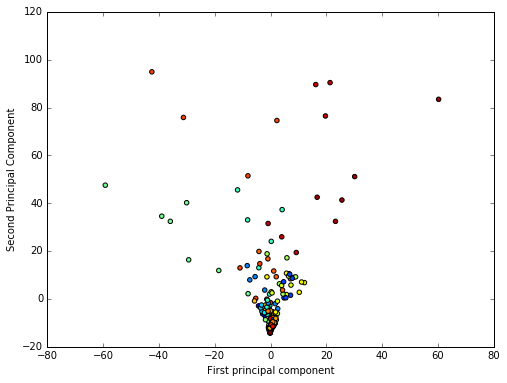

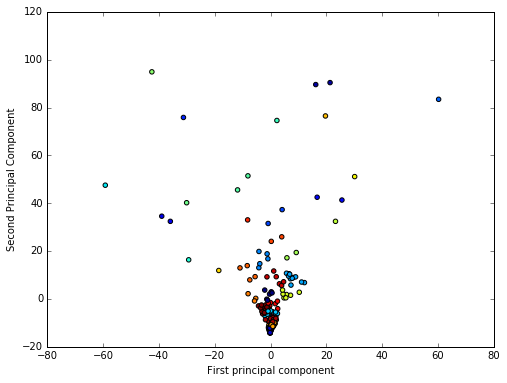

In [49]:
import pandas as pd

def main():
    scaled_data,x_pca,NUM, SAMPLE, pca.components_ = pca()
    print(pca.components_.shape)

    #df_result = pd.DataFrame(pca.components_,columns=record)
    return

if __name__ == '__main__':
    main()

## PCA on minmax data (post-normalization)

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
%matplotlib inline

def getData():
    data = pd.read_csv('minmax_data.csv', header = 0)
    print(data.shape)
    feature = pd.DataFrame.as_matrix(data.iloc[:,2:722])
    record = pd.DataFrame.as_matrix(data.iloc[:,1:2])
    print(feature.shape)
    print(record.shape)
            
    feature, record = np.array(feature), np.array(record)

    return feature, record


In [22]:
from sklearn.preprocessing import StandardScaler

def scaler():   
    feature, record = getData()
    
    scaler = StandardScaler()
    scaler.fit(feature)
    print(scaler.fit(feature))
    
    scaled_data = scaler.transform(feature)
    print(scaled_data)

    return scaled_data, feature, record


In [27]:
from sklearn.decomposition import PCA
import pandas as pd
import numpy 

def pca():
    scaled_data, feature, record = scaler()
    
    pca = PCA(n_components=2)
    pca.fit(scaled_data)
    norm_pca = pca.transform(scaled_data)
    
    print(scaled_data.shape)
    print(norm_pca.shape)
    #print(record)
    print(pca.components_)
    
    kmeans = KMeans(n_clusters=32, random_state=0).fit(norm_pca)
    label = kmeans.labels_

    plt.figure(figsize=(8,6))
    plt.scatter(norm_pca[:,0],norm_pca[:,1], c= record)
    plt.xlabel('First principal component')
    plt.ylabel('Second Principal Component')

    plt.figure(figsize=(8,6))
    plt.scatter(norm_pca[:,0],norm_pca[:,1], c= label)
    plt.xlabel('First principal component')
    plt.ylabel('Second Principal Component')
    
    #result = [x_pca, label, NUM]
    #results="/Users/shuixinjiang/Desktop/DATS6203/Final/pca_data.xlsx"
    #writer = pd.ExcelWriter(results)
    numpy.savetxt('/Users/shuixinjiang/Desktop/DATS6203/Final/norm_pca_data.csv',norm_pca,delimiter=',')
    numpy.savetxt('/Users/shuixinjiang/Desktop/DATS6203/Final/norm_pca_label.csv',label,delimiter=',')
    #x_pca.to_excel(writer,'x_pca',index=False)
    #label.to_excel(writer,'kmeans_label',index=False)
    #NUM.to_excel(writer, 'NUM', index = False)
    #writer.save()
    
    return scaled_data,norm_pca,feature, record, pca.components_

(224, 722)
(224, 720)
(224, 1)
StandardScaler(copy=True, with_mean=True, with_std=True)
[[-0.45614445 -0.62763603 -0.67910506 ..., -0.72014741 -0.68767606
  -0.5799536 ]
 [-0.49388883 -0.62763603 -0.6798707  ..., -0.35991398 -0.33799832
   0.12179106]
 [ 0.33699872  0.65581579  0.60409918 ..., -0.56487155 -0.58669154
  -0.54848523]
 ..., 
 [ 7.55773459  5.49981137  1.99564078 ...,  3.52444188  3.07265149
   2.79660254]
 [-0.50561284 -0.62763603 -0.70322256 ..., -0.83705521 -0.76002317
  -0.6649182 ]
 [-0.50561284 -0.62763603 -0.70322256 ..., -0.83705521 -0.76002317
  -0.6649182 ]]
(224, 720)
(224, 2)
[[ 0.02760429  0.03166941  0.03687315 ...,  0.04191632  0.03704994
   0.03069255]
 [ 0.05347879  0.04110427 -0.00242083 ..., -0.00053097  0.02008008
   0.03682012]]
(2, 720)


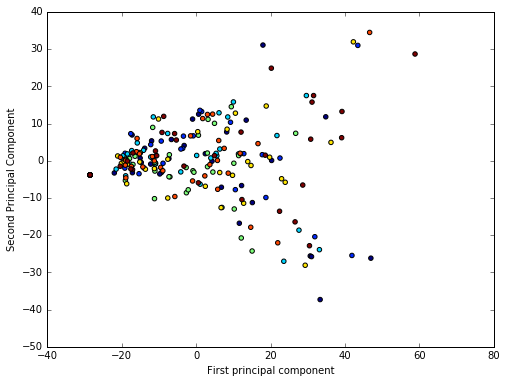

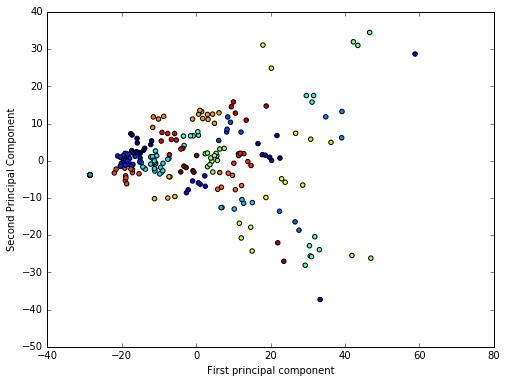

In [28]:
import pandas as pd

def main():
    scaled_data,norm_pca,feature, record, pca.components_ = pca()
    print(pca.components_.shape)

    #df_result = pd.DataFrame(pca.components_,columns=record)
    return

if __name__ == '__main__':
    main()

## PCA on maxnorm data (post-normalization)

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
from sklearn.preprocessing import StandardScaler
%matplotlib inline

def getData():
    data = pd.read_csv('maxnorm_data.csv', header = -1)
    print(data.shape)
    feature = pd.DataFrame.as_matrix(data.iloc[:,2:722])
    record = pd.DataFrame.as_matrix(data.iloc[:,1:2])
    print(feature.shape)
    print(record.shape)
            
    feature, record = np.array(feature), np.array(record)

    return feature, record

def scaler():   
    feature, record = getData()
    
    scaler = StandardScaler()
    scaler.fit(feature)
    print(scaler.fit(feature))
    
    scaled_data = scaler.transform(feature)
    print(scaled_data)

    return scaled_data, feature, record



In [40]:
from sklearn.decomposition import PCA
import pandas as pd
import numpy 

def pca():
    scaled_data, feature, record = scaler()
    
    pca = PCA(n_components=2)
    pca.fit(scaled_data)
    norm_pca = pca.transform(scaled_data)
    
    print(scaled_data.shape)
    print(norm_pca.shape)
    #print(record)
    print(pca.components_)
    
    kmeans = KMeans(n_clusters=32, random_state=0).fit(norm_pca)
    label = kmeans.labels_

    plt.figure(figsize=(8,6))
    plt.scatter(norm_pca[:,0],norm_pca[:,1], c= record)
    plt.xlabel('First principal component')
    plt.ylabel('Second Principal Component')

    plt.figure(figsize=(8,6))
    plt.scatter(norm_pca[:,0],norm_pca[:,1], c= label)
    plt.xlabel('First principal component')
    plt.ylabel('Second Principal Component')
    
    #result = [x_pca, label, NUM]
    #results="/Users/shuixinjiang/Desktop/DATS6203/Final/pca_data.xlsx"
    #writer = pd.ExcelWriter(results)
    numpy.savetxt('/Users/shuixinjiang/Desktop/DATS6203/Final/maxnorm_pca_data.csv',norm_pca,delimiter=',')
    numpy.savetxt('/Users/shuixinjiang/Desktop/DATS6203/Final/maxnorm_pca_label.csv',label,delimiter=',')
    #x_pca.to_excel(writer,'x_pca',index=False)
    #label.to_excel(writer,'kmeans_label',index=False)
    #NUM.to_excel(writer, 'NUM', index = False)
    #writer.save()
    
    return scaled_data,norm_pca,feature, record, pca.components_

(224, 720)
(224, 718)
(224, 1)
StandardScaler(copy=True, with_mean=True, with_std=True)
[[-0.74099357 -0.66210191 -0.58455979 ..., -0.74799216 -0.74790196
  -0.69064885]
 [-0.74167157 -0.66756337 -0.57607238 ..., -0.43325355 -0.44963719
  -0.09591782]
 [ 0.38796699  0.1216534  -0.11534274 ..., -0.60897988 -0.65662416
  -0.65767818]
 ..., 
 [ 2.33456331  0.2819026  -0.03148971 ...,  3.48556385  3.23915015
   3.14649162]
 [-0.76209356 -0.68263108 -0.60015254 ..., -0.85001541 -0.8095594
  -0.7624385 ]
 [-0.76209356 -0.68263108 -0.60015254 ..., -0.85001541 -0.8095594
  -0.7624385 ]]
(224, 718)
(224, 2)
[[ 0.03926557  0.03491856  0.03123843 ...,  0.04231912  0.03983281
   0.03670779]
 [-0.00067514 -0.03806271 -0.05442364 ...,  0.00352375  0.02179468
   0.03635246]]
(2, 718)


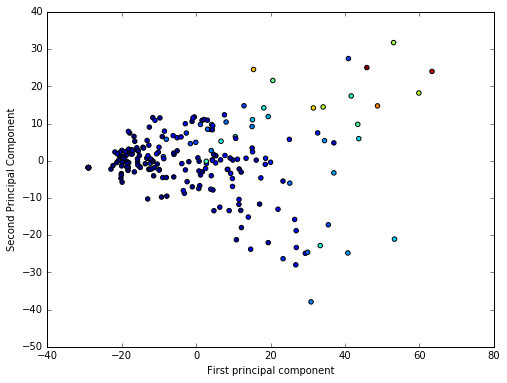

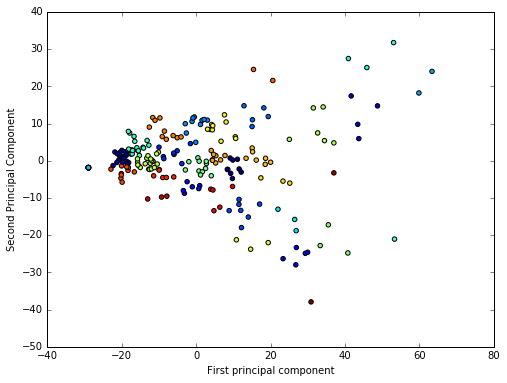

In [41]:
import pandas as pd

def main():
    scaled_data,norm_pca,feature, record, pca.components_ = pca()
    print(pca.components_.shape)

    #df_result = pd.DataFrame(pca.components_,columns=record)
    return

if __name__ == '__main__':
    main()